In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Beer Recommender Analyse</h1>

Voor het maken van het KNN algoritme heb ik even een analyse gedaan over hoe de dataset er ongeveer uit ziet. Dit heb ik gedaan doorgebruik te maken van jupyter notebook en een aantal libraries. Dit geeft mij een inzicht in hoe ik dit allemaal moet aanpakken voordat ik een algoritme ga programmeren 


In [30]:
beer = pd.read_csv('open_units.csv', delimiter=',')
beer.head(10)

,Product,Brand,Category,Style,Quantity,Quantity Units,Volume,Package,ABV,Units of Alcohol,Units (4 Decimal Places),Units per 100ml
0,13 Guns,Crafty Dan,Beer,IPA,330,ml,330,bottle,5.5,1.8,1.8150,0.55
1,13 Guns,Crafty Dan,Beer,IPA,330,ml,330,can,5.5,1.8,1.8150,0.55
2,13 Guns,Crafty Dan,Beer,IPA,1,pint,568,draught,5.5,3.1,3.1240,0.55
3,Abbot Ale,Greene King,Beer,Ale,500,ml,500,bottle,5.0,2.5,2.5000,0.50
4,Abbot Ale,Greene King,Beer,Beer,1,pint,568,draught,5.0,2.8,2.8400,0.50
5,Addlestones Cloudy,Addlestones,Cider,NaN,500,ml,500,bottle,5.0,2.5,2.5000,0.50
6,Addlestones Cloudy,Stone,Cider,NaN,1,pint,568,draught,5.2,3.0,2.9536,0.52
7,Adnams Broadside,Adnams,Beer,NaN,1,pint,568,draught,4.7,2.7,2.6696,0.47
8,Adnams Crystal Rye IPA,Adnams,Beer,Rye Beer,330,ml,330,can,5.0,1.7,1.6500,0.50
9,Adnams Dry Hopped Lager,Adnams,Beer,Lager,330,ml,330,bottle,4.2,1.4,1.3860,0.42


<h1>Uitleg van alle kolomwaardes </h1>
<br></br>

<li> Product - The name the product is known by. Typically includes the brand.</li>
<li>Brand - The brand under which the product is marketed. One brand may contain multiple products.</li>
<li>Category - Category of alcoholic drink.</li>
<li>Style - Style of drink within the category.</li>
<li>Quantity - Quantity of Quantity Units in this serving.</li>
<li>Quantity Units - A measure of liquid volume to which Quantity relates. Not to be confused with Units of Alcohol!</li>
<li>Volume - Volume of liquid in ml.</li>
<li>Package - The packaging of this serving, e.g. bottle, can, draught.</li>
<li>ABV - Percentage of alcohol by volume.</li>
<li>Units of Alcohol - Units of alcohol rounded to one decimal place.</li>
<li>Units (4 Decimal Places) - Units of alcohol rounded to four decimal places.</li>
<li>Units per 100ml - Units of alcohol in each 100ml of liquid.</li>

<p><h2> Voor ons algoritme zijn lang niet alle waardes belangrijk. Het gaat bij een biertje namelijk alleen om de Product, ABV, style</h2> </p>

In [36]:
df=beer[['Product','ABV','Style']]
df.head(10)

,Product,ABV,Style
0,13 Guns,5.5,IPA
1,13 Guns,5.5,IPA
2,13 Guns,5.5,IPA
3,Abbot Ale,5.0,Ale
4,Abbot Ale,5.0,Beer
5,Addlestones Cloudy,5.0,NaN
6,Addlestones Cloudy,5.2,NaN
7,Adnams Broadside,4.7,NaN
8,Adnams Crystal Rye IPA,5.0,Rye Beer
9,Adnams Dry Hopped Lager,4.2,Lager


<h2> Hieronder staan alle waardes waar wij mee te maken hebben, zo is er te zien dat we veel verschillende producten hebben, maar minder soorten ( Style) bier. Producten kunnen dus dezelfde Style hebben. </h2>

In [42]:
df['Product'].unique()

array(['13 Guns', 'Abbot Ale', 'Addlestones Cloudy', 'Adnams Broadside',
       'Adnams Crystal Rye IPA', 'Adnams Dry Hopped Lager',
       'Adnams FreeWheel', 'Adnams Ghost Ship', 'Adnams Mosaic Pale Ale',
       'Adnams Sloe Storm', 'Adnams Southwold Bitter', 'Ale Fresco',
       'Alhambra Especial', 'Alhambra Reserva',
       'Amarillo Single Hop Session IPA', 'Amigos', 'Amstel',
       'Amstel Lager', 'Anchor California Lager', 'Anchor Liberty Ale',
       'Anchor Porter', 'Anchor Steam Beer', 'Angry Orchard Cider',
       'Angry Orchard Hard Cider', 'Ansells Drum Mild', 'Asahi Super Dry',
       'Ashton Press Cider', 'Aspall Cyder', 'Aspall Cyderkyn',
       'Aspall Draught Cyder', 'Aspall Harry Sparrow',
       "Aspall Isabel's Berry", 'Aspall Mulled Cyder',
       "Aspall Peronelle's Blush", 'Aspall Premier Cru Cyder',
       'Babycham Popping Cork', 'Back of the Net', 'Bad Apple Cider',
       'Bah Humbug', 'Bass', 'Bass Smooth', 'Bath Ales Gem',
       "Beck's Bier", "Beck's B

In [38]:
df['Style'].unique()

array(['IPA', 'Ale', 'Beer', nan, 'Rye Beer', 'Lager', 'Summer Ale',
       'Pale Ale', 'Amber Ale', 'Porter', 'Steam Beer', 'Bitter',
       'Fruit Cider', 'Mulled Cider', 'Perry', 'Blonde Ale', 'Sour Beer',
       'Stout', 'Wheat Beer', 'Red Ale', 'Brown Ale', 'Golden Ale',
       'Light Ale', 'Apple Wine', 'Winter Ale', 'Fruit Beer',
       'Barley Wine', 'Dark Ale', 'Abbey Beer', 'Gose', 'Saison'],
      dtype=object)

In [39]:
df['ABV'].unique()

array([ 5.5,  5. ,  5.2,  4.7,  4.2,  3.6,  4.5,  4.1,  4. ,  3.7,  4.3,
        4.8,  6.4,  3.8,  5.1,  4.9,  5.9,  5.6,  3.2,  4.6,  7. ,  4.4,
        0. ,  3.1,  3.9,  2.7,  6.5,  3.5,  5.4,  5.7,  8.5,  8.2,  7.2,
        0.5,  3.4,  9. ,  6.6,  7.5,  6. ,  8. ,  5.3,  6.7,  6.1,  6.8,
        6.9,  9.5, 11.2,  3.3,  7.1,  7.4,  6.2,  3. ,  9.2,  0.1,  7.7,
        8.4,  2.8,  0.2,  5.8,  7.3,  8.8,  6.3])

<h2> Het is ook intressant om te weten wat het gemiddelde percentage van een biertje is: </h2>

In [43]:
np.mean(beer['ABV'])

4.746025878003697

Het gemiddelde is dus ongeveer 4.7

In [ ]:
<h2> hieronder zien we dat er eigenlijk maar 2 catergorieen zijn die deze dataset bevat, dat zijn bier

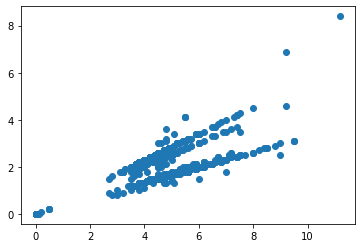

In [59]:
plt.scatter(beer['ABV'], beer['Units of Alcohol'])
plt.show()